In [1]:
using Plots

In [2]:
T(x; c) = 2*x+c*sinpi(2*x)+0.25#0.5*x*(1-x)

T (generic function with 1 method)

The annulus is
$$
A_{r, R} = \{z \mid T'(z), 1/T'(z) \textrm{ is holomorphic}\}
$$

In [3]:
1/(2*pi)

0.15915494309189535

In [4]:
c = 1/(2*pi)-1/64
max_r = 0.1

0.1

In [5]:
F(z) = T(z; c = c)

F (generic function with 1 method)

We check that the lines with constant imaginary part end up above themselves.

In [6]:
radius(η) = minimum( imag.(F.([x+η*im for x in 0:0.001:1])))-2*η

radius (generic function with 1 method)

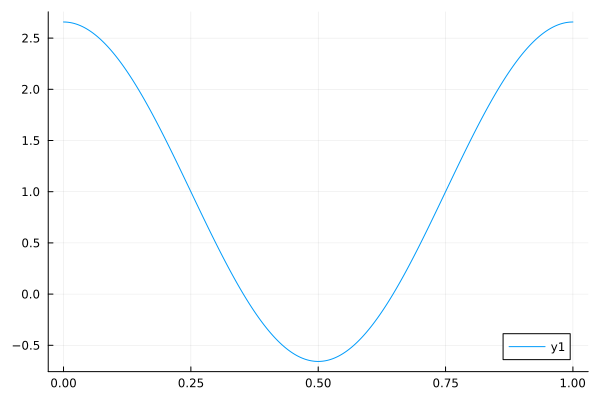

In [8]:
η = 0.5
plot(0:0.001:1, imag.(F.([x+η*im for x in 0:0.001:1])))

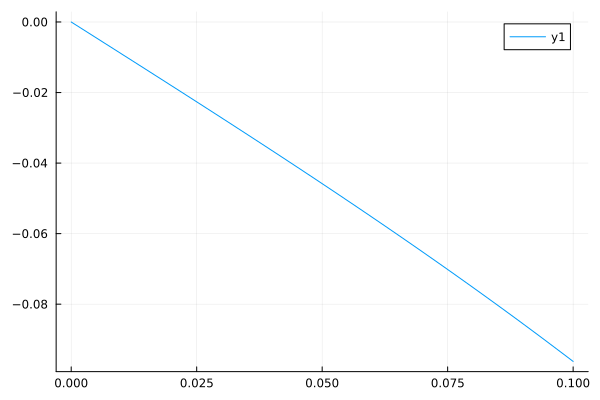

In [7]:
plot(radius, 0, max_r)

In [10]:
step = 0.001

bestrad, indexrad = findmax([radius(η) for η in 0:step:max_r])

(0.004834301160946172, 75)

In [11]:
η = step*indexrad

0.075

In [12]:
all(imag.(F.([x+η*im for x in 0:0.001:1])) .> η)

true

In [13]:
ρup = minimum(imag.(F.([x+η*im for x in 0:0.001:1])))

0.07983185521743869

In [14]:
all(imag.(F.([x-η*im for x in 0:0.001:1])) .< -η)

true

In [15]:
ρdown = maximum(imag.(F.([x-η*im for x in 0:0.001:1])))

-0.07983185521743869

In [16]:
ρ = min(abs(ρup), abs(ρdown))

0.07983185521743869

The problem now reduces to compute the zeros of 
$$
T'(z) = 2+c\cdot 2\pi \cos(2\pi z)
$$.

By the formula
$$
\cos(a+i b) = \cos(a) \cosh(b)-i \sin(a)\sinh(b)
$$
since we cannot have imaginary part, we have that 
$$
\sin(2\pi \Re(z))\sinh(2\pi \Im(z)) = 0,
$$
therefore $\Re(z)=0$, $\Re(z) = 0.5$, or $\Im(z)=0$.

If $\Re(z)=0$, since $\cosh(2\pi \Im(z))$ is always positive, then $T'(z)$
cannot be $0$.

If $\Im(z)=0$ then, we already now that the derivative is bigger than $1$.

This leaves the case $\Im(z)=0.5$, this means that we need to solve the equation
$$
2-c \cdot 2\pi \cosh(2\pi b) = 0.
$$


Therefore
$$
\cosh(2\pi \cdot  b) = \frac{2}{c 2\pi}
$$

In [17]:
pole = acosh(2/(2*π*c))/2π

0.22829446163768338

In [18]:
pole > η

true

Since the pole is outside the $\eta$ strip, the constants are $\eta$ and $\rho$, and the constant is given by:
$$
\sqrt{1+2 \frac{e^{4\pi(\alpha-\eta)}}{1-e^{4\pi(\alpha-\eta)}}} e^{2\pi \eta}\left(1+2\frac{e^{-2 \pi (\rho-\alpha)}}{1-e^{-2 \pi (\rho-\alpha)}}\right)
$$
for some $\eta<\alpha<\rho$.

In [19]:
C(α; η, ρ)=sqrt(1+2*exp(4*pi*(η-α))/(1-exp(4*pi*(η-α))))exp(2*pi*η)*(1+2*exp(-2*pi*(ρ-α))/(1-exp(-2*pi*(ρ-α))))

C (generic function with 1 method)

In [20]:
C(α) = C(α; η = η, ρ = ρ)

C (generic function with 1 method)

In [21]:
N = 1024
vals = C.([η+i*(ρ-η)/N for i in 1:N-1])

1023-element Vector{Float64}:
  19402.30686625033
  13732.924875900766
  11223.86679484083
   9729.681891063152
   8711.030981441967
   7959.857212373678
   7376.640923339837
   6907.006287750388
   6518.402776649902
   6189.997462075594
      ⋮
  69228.6268600884
  77843.89097994605
  88920.7237856526
 103689.90943476313
 124366.85941179481
 155382.39668687904
 207075.10819132417
 310460.7547207466
 620618.1402593027

In [22]:
best, index = findmin(vals)

(1573.6931588218242, 341)

In [23]:
α = η+index*(ρ-η)/N

0.07660904553627597

In [24]:
ratio = exp(-2*π*α)

0.6179493212662225

In [35]:
k = 128

128

In [36]:
strong_weak = sqrt(2)*sqrt(ratio^k/(1-ratio))

9.559551602754684e-14

In [37]:
(strong_weak*best)

1.504380095865925e-10

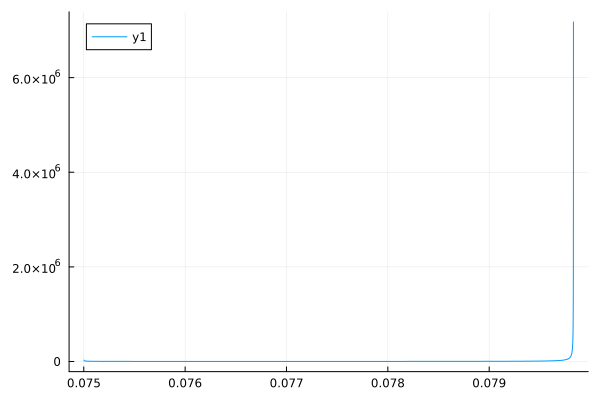

In [28]:
plot(α-> C(α; η = η, ρ = ρ), η, ρ)